In [5]:
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from astropy.visualization import ZScaleInterval, LogStretch
from scipy.interpolate import interp1d
import matplotlib
from astropy.convolution import convolve, Box1DKernel
from scipy.stats import sigmaclip

In [6]:
import matplotlib

cmap = matplotlib.cm.get_cmap('viridis_r')
# cmap = matplotlib.cm.get_cmap('jet')
# cmap = matplotlib.cm.get_cmap('cividis')
norm = matplotlib.colors.Normalize(vmin=0, vmax=35) # inferno scale
# norm = matplotlib.colors.Normalize(vmin=4, vmax=10.5) # jet scale
# norm = matplotlib.colors.LogNorm(vmin=4, vmax=14)


plot_mcolors_b = [cmap(norm(order)) for order in np.arange(35)]

cmap = matplotlib.cm.get_cmap('inferno')
# cmap = matplotlib.cm.get_cmap('jet')
# cmap = matplotlib.cm.get_cmap('cividis')
norm = matplotlib.colors.Normalize(vmin=0, vmax=38) # inferno scale
# norm = matplotlib.colors.Normalize(vmin=4, vmax=10.5) # jet scale
# norm = matplotlib.colors.LogNorm(vmin=4, vmax=14)


plot_mcolors_r = [cmap(norm(order)) for order in np.arange(33)+5]
# print(len(plot_mcolors))

In [9]:
star_red = fits.open('<path_to_reduced_data>/<reduced_red_file>_formattedOutput.fits')
star_blue = fits.open('<path_to_reduced_data>/<reduced_red_file>_formattedOutput.fits')

In [21]:
def plot_orders(star_red, star_blue, xlim=None, ylim=None):

    fig = plt.figure(figsize = (16,6))

    ax = fig.add_subplot(111)

    orders = np.arange(35)

    for order, plotcolor in zip(orders,plot_mcolors_r):

        wave = star_red[4].data[order,:]
        data = star_red[1].data[order,:,0]

        ax.plot(wave, data, c=plotcolor, lw=2, label=f'Order index = {order}')


    for order, plotcolor in zip(orders,plot_mcolors_b):

        wave = star_blue[4].data[order,:]
        data = star_blue[1].data[order,:,0]

        ax.plot(wave, data, c=plotcolor, lw=2, label=f'Order index = {order}')



    # Label the x and y axes
    ax.set_xlabel(r'Wavelength ($\rm \AA$, air)', fontsize=16)
    ax.set_ylabel(r'Flat Corrected Flux', fontsize=16)
    # ax.set_yticks([1 - offset for offset in offsets])
    ax.tick_params(axis='both', direction='in', labelsize=16)

    # Make a legend and set some of my prefered styles for the legend
    # leg = ax.legend(loc=0, numpoints=1, framealpha=0.5, prop={'size':14})
    # leg.get_frame().set_linewidth(0.0)

    # Format the numbers on the xaxis to make them people friendly
    ax.get_xaxis().get_major_formatter().set_useOffset(False)
    ax.get_xaxis().get_major_formatter().set_scientific(False)

    # ax.set_yscale('log')
    if xlim is None:
        ax.set_xlim([3400, 10800])
    else:
        ax.set_xlim(xlim)

    if ylim is None:
        ax.set_ylim([-100, 1000000])
    else:
        ax.set_ylim(ylim)


    plt.tight_layout()
    # plt.savefig('spec_plot_smss_blue3.pdf')
    plt.show()
    plt.close(fig)



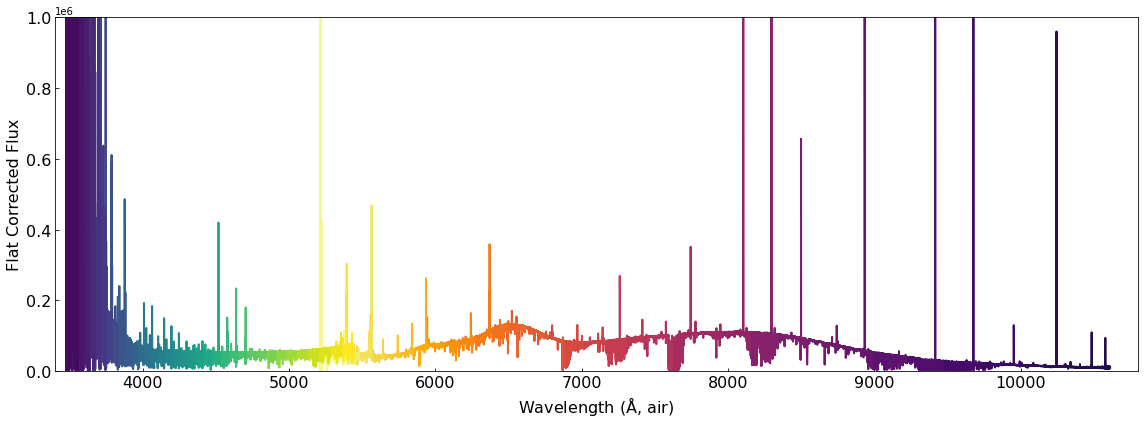

In [22]:
plot_orders(star_red, star_blue)

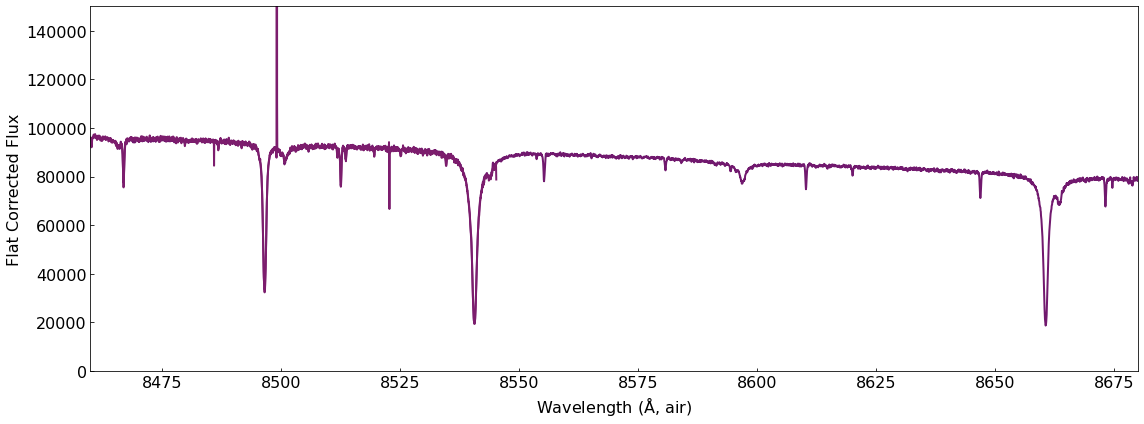

In [23]:
plot_orders(star_red, star_blue, xlim=[8460,8680], ylim=[-100, 150000])

In [1]:
def plot_combined(star_red, star_blue, xlim=None, ylim=None):

    fig = plt.figure(figsize = (16,6))

    ax = fig.add_subplot(111)

    wave = star_red[7].data[:]
    data = star_red[5].data[:,0]

    ax.plot(wave, data, c='r', lw=2, label=f'Red')

    wave = star_blue[7].data[:]
    data = star_blue[5].data[:,0]

    ax.plot(wave, data, c='b', lw=2, label=f'Blue')



    # Label the x and y axes
    ax.set_xlabel(r'Wavelength ($\rm \AA$, air)', fontsize=16)
    ax.set_ylabel(r'Flat Corrected Flux', fontsize=16)
    # ax.set_yticks([1 - offset for offset in offsets])
    ax.tick_params(axis='both', direction='in', labelsize=16)

    # Make a legend and set some of my prefered styles for the legend
    # leg = ax.legend(loc=0, numpoints=1, framealpha=0.5, prop={'size':14})
    # leg.get_frame().set_linewidth(0.0)

    # Format the numbers on the xaxis to make them people friendly
    ax.get_xaxis().get_major_formatter().set_useOffset(False)
    ax.get_xaxis().get_major_formatter().set_scientific(False)

    # ax.set_yscale('log')
    if xlim is None:
        ax.set_xlim([3400, 10800])
    else:
        ax.set_xlim(xlim)

    if ylim is None:
        ax.set_ylim([-100, 1000000])
    else:
        ax.set_ylim(ylim)


    plt.tight_layout()
    # plt.savefig('spec_plot_smss_blue3.pdf')
    plt.show()
    plt.close(fig)


In [ ]:
plot_combined(star_red, star_blue)

In [ ]:
plot_combined(star_red, star_blue, xlim=[8460,8680], ylim=[-100, 150000])